# Analista    
Jonathas Carneiro

# Infra

In [ ]:
pip install gcsfs

In [2]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 KB 11.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import pandera as pa
import numpy as np
import os
from google.cloud import storage

In [4]:
pd.set_option('display.max_columns',100)

In [5]:
#Configurações Google Cloud Storage
serviceAccount = '/content/total-bliss-377820-f1ed919eefd3.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [6]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('jonathascarneiro01')
bucket.blob('ocorrenciass.csv')
path = 'gs://jonathascarneiro01/brutos/ocorrenciass.csv'

# Pandas

In [7]:
df = pd.read_csv(path,sep=';',encoding='ISO-8859-1',parse_dates=['ocorrencia_dia'],dayfirst=True)

##Pré análise

Visualizando de Maneira Geral o dataframe

In [8]:
df

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,81027,81027,81027,81027,INCIDENTE GRAVE,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
1,81030,81030,81030,81030,81030,INCIDENTE,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
2,81023,81023,81023,81023,81023,INCIDENTE GRAVE,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
3,81029,81029,81029,81029,81029,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,81025,81025,81025,81025,81025,INCIDENTE,NaN,NaN,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
6765,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,***,2010-01-04,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
6766,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,***,2010-01-03,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
6767,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [9]:
df.head(30)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,81027,81027,81027,81027,INCIDENTE GRAVE,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
1,81030,81030,81030,81030,81030,INCIDENTE,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
2,81023,81023,81023,81023,81023,INCIDENTE GRAVE,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
3,81029,81029,81029,81029,81029,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,81025,81025,81025,81025,81025,INCIDENTE,NaN,NaN,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
5,81019,81019,81019,81019,81019,ACIDENTE,NaN,NaN,PORTO ALEGRE,RS,BRASIL,***,2022-10-03,20:50:00,NÃO,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
6,81022,81022,81022,81022,81022,INCIDENTE,NaN,NaN,LOBATO,PR,BRASIL,***,2022-10-03,15:38:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
7,81021,81021,81021,81021,81021,ACIDENTE,NaN,NaN,NOVA BANDEIRANTES,MT,BRASIL,***,2022-10-02,19:00:00,NÃO,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
8,81009,81009,81009,81009,81009,INCIDENTE GRAVE,NaN,NaN,NAVIRAÍ,MS,BRASIL,**NI,2022-10-01,10:10:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
9,81012,81012,81012,81012,81012,INCIDENTE,NaN,NaN,LINHARES,ES,BRASIL,***,2022-09-30,12:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [ ]:
df.tail()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
6764,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,05/01/2010,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
6765,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,***,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
6766,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,***,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
6767,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
6768,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,BRASIL,SBRJ,03/01/2010,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [ ]:
df.dtypes

codigo_ocorrencia                          int64
codigo_ocorrencia1                         int64
codigo_ocorrencia2                         int64
codigo_ocorrencia3                         int64
codigo_ocorrencia4                         int64
ocorrencia_classificacao                  object
ocorrencia_latitude                       object
ocorrencia_longitude                      object
ocorrencia_cidade                         object
ocorrencia_uf                             object
ocorrencia_pais                           object
ocorrencia_aerodromo                      object
ocorrencia_dia                    datetime64[ns]
ocorrencia_hora                           object
investigacao_aeronave_liberada            object
investigacao_status                       object
divulgacao_relatorio_numero               object
divulgacao_relatorio_publicado            object
divulgacao_dia_publicacao                 object
total_recomendacoes                        int64
total_aeronaves_envo

Os tipos parecem ok

In [ ]:
df.shape

(6769, 22)

Setei a quantidade de dados padrão que devem haver em todas as colunas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769 entries, 0 to 6768
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   codigo_ocorrencia               6769 non-null   int64         
 1   codigo_ocorrencia1              6769 non-null   int64         
 2   codigo_ocorrencia2              6769 non-null   int64         
 3   codigo_ocorrencia3              6769 non-null   int64         
 4   codigo_ocorrencia4              6769 non-null   int64         
 5   ocorrencia_classificacao        6769 non-null   object        
 6   ocorrencia_latitude             5135 non-null   object        
 7   ocorrencia_longitude            5135 non-null   object        
 8   ocorrencia_cidade               6769 non-null   object        
 9   ocorrencia_uf                   6769 non-null   object        
 10  ocorrencia_pais                 6769 non-null   object        
 11  ocor

Aqui percebo que há colunas com dados faltando, essas são:   
ocorrencia_latitude           
ocorrencia_longitude           
investigacao_aeronave_liberada     
investigacao_status             
divulgacao_relatorio_numero     
divulgacao_dia_publicacao       


##Backup

In [11]:
dfback = df.copy()

##Transformações (limpeza, conversão, etc)  



In [31]:
df

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,INCIDENTE GRAVE,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
1,81030,INCIDENTE,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
2,81023,INCIDENTE GRAVE,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
3,81029,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,81025,INCIDENTE,NaN,NaN,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
6765,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,***,2010-01-04,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
6766,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,***,2010-01-03,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
6767,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


Checando se há valores repeditos no código de ocorrência ou se são valores únicos

In [10]:
df.codigo_ocorrencia.is_unique

True

Drop de colunas com informações repetidas repetidas

In [ ]:
#Drop de colunas codigo de ocorrencia repetidas
df.drop(['codigo_ocorrencia1','codigo_ocorrencia2','codigo_ocorrencia3','codigo_ocorrencia4'],axis=1,inplace=True)

Decisão a cerca do drop ou não das colunas de investigação de aeronave e status da investigação

In [24]:
df['investigacao_aeronave_liberada'].unique()

array(['SIM', 'NÃO', nan, '***'], dtype=object)

In [25]:
df['investigacao_aeronave_liberada'].value_counts()

SIM    4427
***    2069
NÃO      35
Name: investigacao_aeronave_liberada, dtype: int64

In [26]:
df['investigacao_aeronave_liberada'].isnull().sum()

238

In [27]:
df['investigacao_status'].unique()

array(['ATIVA', 'FINALIZADA', nan], dtype=object)

In [28]:
df['investigacao_status'].value_counts()

FINALIZADA    6013
ATIVA          415
Name: investigacao_status, dtype: int64

In [29]:
df['investigacao_status'].isnull().sum()

341

Drop de colunas com problemas ou não utilizadas nas análises.   
Explicação: A cerca da latitude e longetide decidi dropar pois já contesta cidade e UF da ocorrência, e as demais colunas tem seus significados interligados, e como algumas tem imprecisões e valores faltantes em excesso decidi por não usá-las na análise e dropar elas

In [32]:
# Drop de colunas com problemas e/ou não utilizadas na analise
df.drop(['ocorrencia_latitude','ocorrencia_longitude','investigacao_aeronave_liberada','investigacao_status','divulgacao_relatorio_numero','divulgacao_relatorio_publicado','divulgacao_dia_publicacao'],axis=1,inplace=True)

In [33]:
df

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,0,1,SIM
1,81030,INCIDENTE,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,0,1,NÃO
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,0,1,SIM
3,81029,INCIDENTE,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,0,1,NÃO
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,0,1,NÃO
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,***,2010-01-04,17:30:00,0,1,NÃO
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,***,2010-01-03,12:00:00,0,1,NÃO
6767,40349,INCIDENTE,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,0,1,NÃO


Rename das colunas simplificando

In [34]:
#Reneando colunas
df.rename(columns={'ocorrencia_classificacao':'classificacao','ocorrencia_cidade':'cidade','ocorrencia_uf':'uf','ocorrencia_pais':'pais','ocorrencia_aerodromo':'aerodromo','ocorrencia_dia':'data','ocorrencia_hora':'horario','total_aeronaves_envolvidas':'n_aeronaves','ocorrencia_saida_pista':'saida_pista'},inplace=True)

In [35]:
df.dtypes

codigo_ocorrencia               int64
classificacao                  object
cidade                         object
uf                             object
pais                           object
aerodromo                      object
data                   datetime64[ns]
horario                        object
total_recomendacoes             int64
n_aeronaves                     int64
saida_pista                    object
dtype: object

In [36]:
df

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,0,1,SIM
1,81030,INCIDENTE,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,0,1,NÃO
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,0,1,SIM
3,81029,INCIDENTE,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,0,1,NÃO
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,0,1,NÃO
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,***,2010-01-04,17:30:00,0,1,NÃO
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,***,2010-01-03,12:00:00,0,1,NÃO
6767,40349,INCIDENTE,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,0,1,NÃO


Olhando o dataframe acima percebo inconsistências na coluna de aerodromos, e decido verificar a fundo

In [ ]:
sorted(pd.unique(df['aerodromo']))

['***',
 '**NI',
 '5JTI',
 '9PAA',
 '9PBS',
 '9PFC',
 '9PFX',
 '9PHD',
 '9PSD',
 'APUA',
 'SBAE',
 'SBAN',
 'SBAQ',
 'SBAR',
 'SBAT',
 'SBAU',
 'SBAX',
 'SBBE',
 'SBBH',
 'SBBI',
 'SBBP',
 'SBBQ',
 'SBBR',
 'SBBU',
 'SBBV',
 'SBBW',
 'SBBZ',
 'SBCA',
 'SBCB',
 'SBCF',
 'SBCG',
 'SBCH',
 'SBCJ',
 'SBCP',
 'SBCR',
 'SBCT',
 'SBCX',
 'SBCY',
 'SBCZ',
 'SBDN',
 'SBEG',
 'SBEK',
 'SBFE',
 'SBFI',
 'SBFL',
 'SBFN',
 'SBFS',
 'SBFZ',
 'SBGL',
 'SBGO',
 'SBGP',
 'SBGR',
 'SBGV',
 'SBGW',
 'SBHT',
 'SBIH',
 'SBIL',
 'SBIP',
 'SBIT',
 'SBIZ',
 'SBJA',
 'SBJC',
 'SBJD',
 'SBJF',
 'SBJH',
 'SBJI',
 'SBJP',
 'SBJR',
 'SBJU',
 'SBJV',
 'SBKG',
 'SBKP',
 'SBLE',
 'SBLJ',
 'SBLO',
 'SBMA',
 'SBMD',
 'SBME',
 'SBMG',
 'SBMK',
 'SBML',
 'SBMO',
 'SBMQ',
 'SBMS',
 'SBMT',
 'SBMY',
 'SBNF',
 'SBNM',
 'SBNT',
 'SBNV',
 'SBPA',
 'SBPB',
 'SBPC',
 'SBPF',
 'SBPG',
 'SBPJ',
 'SBPK',
 'SBPL',
 'SBPN',
 'SBPO',
 'SBPP',
 'SBPR',
 'SBPS',
 'SBPV',
 'SBQV',
 'SBRB',
 'SBRD',
 'SBRF',
 'SBRJ',
 'SBRP',
 'SBSC',
 '

## Backup
Backup antes do tratamento de inconsistências

In [38]:
df_backup2 = df.copy()

In [ ]:
#inconsistencias encontradas, coluna aerodromo:  
'''
'***',
 '**NI'
'''
('***','**NI')

Usando o numpy para passar os dados inconsistentes para NaN, tipo de dados bem aceitos por bancos de dados, já que o pandas só poderia transforma em NA, um tipo que não é bem aceito.

In [39]:
# Alteração 
df.replace(['***','**NI'],np.NaN,inplace=True)

Conferindo o rename

In [40]:
(pd.unique(df['aerodromo']))

array(['SBSP', 'SBVT', 'SDAI', 'SBBH', 'SBEG', nan, 'SBNV', 'SBUL',
       'SBAU', 'SBBP', 'SBTE', 'SBGR', 'SBMT', 'SBCT', 'SBCF', 'SIEK',
       'SBRJ', 'SDLP', 'SWPD', 'SBMA', 'SNYP', 'SNHH', 'SBJF', 'SBCY',
       'SBPS', 'SBMK', 'SBNF', 'SBTF', 'SSMK', 'SNAX', 'SBKP', 'SBFZ',
       'SNPA', 'SBIZ', 'SNFX', 'SDRK', 'SBRF', 'SSBN', 'SBPR', 'SBSJ',
       'SBST', 'SBGO', 'SDCO', 'SBSV', 'SBPJ', 'SBGL', 'SBRD', 'SBBE',
       'SBCH', 'SBLO', 'SBPL', 'SWGW', 'SWLB', 'SBBU', 'SBMQ', 'SIPO',
       'SIAN', 'SBJV', 'SNDC', 'SBBI', 'SBSC', 'SSKG', 'SBBR', 'SSBG',
       'SBIL', 'SBPO', 'SDAM', 'SSOG', 'SBPV', 'SBSR', 'SBBV', 'SBSN',
       'SBFI', 'SDFD', 'SJEH', 'SBSI', 'SWFN', 'SDIG', 'SNHS', 'SBJP',
       'SBPA', 'SBJA', 'SBJR', 'SBRP', 'SISN', 'SBMO', 'SNRU', 'SNQV',
       'SNCP', 'SDIH', 'SBTG', 'SIVU', 'SWMV', 'SIRI', 'SNIT', 'SBRB',
       'SSPI', 'SWCA', 'SBJI', 'SBFL', 'SDRC', 'SNMH', 'SNBS', 'SWLW',
       'SSOT', 'SNPO', 'SBCG', 'SBJD', 'SDEN', 'APUA', 'SDAG', 'SIUD',
       'S

In [ ]:
df

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,0,1,SIM
1,81030,INCIDENTE,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,0,1,NÃO
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,0,1,SIM
3,81029,INCIDENTE,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,0,1,NÃO
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,0,1,NÃO
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,NaN,2010-01-04,17:30:00,0,1,NÃO
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,NaN,2010-01-03,12:00:00,0,1,NÃO
6767,40349,INCIDENTE,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,0,1,NÃO


In [ ]:
df.dtypes

codigo_ocorrencia               int64
classificacao                  object
cidade                         object
uf                             object
pais                           object
aerodromo                      object
data                   datetime64[ns]
horario                        object
total_recomendacoes             int64
n_aeronaves                     int64
saida_pista                    object
dtype: object

Checando quantos valores nulas há no dataframe

In [ ]:
#Verificar dados nulos, ausentes, etc
df.isna().sum()

codigo_ocorrencia         0
classificacao             0
cidade                    0
uf                        4
pais                      0
aerodromo              2618
data                      0
horario                   2
total_recomendacoes       0
n_aeronaves               0
saida_pista               0
dtype: int64

Aqui comparo com a quantidade de valores nulos que tinha com o dataframe antes do tratamento que fiz até então

Uma diferença de 6.997 dados inconsistêntes

In [ ]:
dfback.isna().sum()

codigo_ocorrencia                    0
codigo_ocorrencia1                   0
codigo_ocorrencia2                   0
codigo_ocorrencia3                   0
codigo_ocorrencia4                   0
ocorrencia_classificacao             0
ocorrencia_latitude               1634
ocorrencia_longitude              1634
ocorrencia_cidade                    0
ocorrencia_uf                        0
ocorrencia_pais                      0
ocorrencia_aerodromo                 0
ocorrencia_dia                       0
ocorrencia_hora                      2
investigacao_aeronave_liberada     238
investigacao_status                341
divulgacao_relatorio_numero        782
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         4988
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
dtype: int64

In [41]:
#Verificando valores contidos
df.count()

codigo_ocorrencia      6769
classificacao          6769
cidade                 6769
uf                     6765
pais                   6769
aerodromo              4151
data                   6769
horario                6767
total_recomendacoes    6769
n_aeronaves            6769
saida_pista            6769
dtype: int64

Criando novo dataframe menor apenas com os dados que eu quero visualizar

In [42]:
df_estado_classificacao = df[['codigo_ocorrencia','uf','classificacao']]

In [43]:
df_estado_classificacao

,codigo_ocorrencia,uf,classificacao
0,81027,SP,INCIDENTE GRAVE
1,81030,ES,INCIDENTE
2,81023,SP,INCIDENTE GRAVE
3,81029,MG,INCIDENTE
4,81025,AM,INCIDENTE
...,...,...,...
6764,40324,RS,INCIDENTE
6765,39527,MT,ACIDENTE
6766,40211,RJ,INCIDENTE
6767,40349,PA,INCIDENTE


##Schema 
validação de dados com pandera

In [44]:
schema = pa.DataFrameSchema(
    columns = {
        'codigo_ocorrencia':pa.Column(pa.Int),
        'classificacao':pa.Column(pa.String),
        'cidade':pa.Column(pa.String),
        'uf':pa.Column(pa.String,pa.Check.str_length(2,2),nullable=True),
        'pais':pa.Column(pa.String),
        'aerodromo':pa.Column(pa.String,pa.Check.str_length(4,4),nullable=True),
        'data':pa.Column(pa.DateTime),
        'horario':pa.Column(pa.String,pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9]):([0-5][0-9])?$'),nullable=True),
        'total_recomendacoes':pa.Column(pa.Int),
        'n_aeronaves':pa.Column(pa.Int),
        'saida_pista':pa.Column(pa.String,pa.Check.str_length(3,3)),
    }
)

In [45]:
df.dtypes

codigo_ocorrencia               int64
classificacao                  object
cidade                         object
uf                             object
pais                           object
aerodromo                      object
data                   datetime64[ns]
horario                        object
total_recomendacoes             int64
n_aeronaves                     int64
saida_pista                    object
dtype: object

## Exploração de Dados

###Busca(Query)  


In [ ]:
# O iloc busca apenas via indice, e não busca por valores(até vai mas n rola), então cuidado ao usar, apenas quando fizer a ordenação por indice
# Como é por indice ele aceita o -1 para buscar o último
#df.iloc[ ]

In [46]:
df.loc[0]

codigo_ocorrencia                    81027
classificacao              INCIDENTE GRAVE
cidade                           SÃO PAULO
uf                                      SP
pais                                BRASIL
aerodromo                             SBSP
data                   2022-10-09 00:00:00
horario                           16:30:00
total_recomendacoes                      0
n_aeronaves                              1
saida_pista                            SIM
Name: 0, dtype: object

In [ ]:
df.loc[1000:1002]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
1000,79801,INCIDENTE GRAVE,CANTÁ,RR,BRASIL,SWPD,2021-01-07,12:35:00,0,1,NÃO
1001,79805,INCIDENTE,GUARULHOS,SP,BRASIL,SBGR,2021-01-07,02:05:00,0,1,NÃO
1002,79865,INCIDENTE,GOVERNADOR VALADARES,MG,BRASIL,SBGV,2021-01-07,15:31:00,0,1,NÃO


In [ ]:
df.loc[1000,'aerodromo']

'SWPD'

In [ ]:
# Busca avançada
df.loc[[0,1000,2000],['classificacao','uf']]

,classificacao,uf
0,INCIDENTE GRAVE,SP
1000,INCIDENTE GRAVE,RR
2000,INCIDENTE,PB


In [ ]:
df.loc[:,'horario']

0       16:30:00
1       16:20:00
2       15:30:00
3       00:44:00
4       20:56:00
          ...   
6764    19:25:00
6765    17:30:00
6766    12:00:00
6767    11:05:00
6768    03:00:00
Name: horario, Length: 6769, dtype: object

Mudar especifico informação de certa coluna, geralmente utilizado para tradução de valores.  
Mais recomendado para valores especificos do que replace pois é mais especifico e descritivo a alteração, e mais fácil conserto.

Cuidado ao converter pois deve-se manter o mesmo tipo da coluna,  
se mudar o tipo de uma coluna com int ou float, vira objeto, msm voltando para int ou float continua objeto, precisa converter novamente

In [47]:
df.loc[df.classificacao == 'INCIDENTE GRAVE']

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,0,1,SIM
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,0,1,SIM
8,81009,INCIDENTE GRAVE,NAVIRAÍ,MS,BRASIL,NaN,2022-10-01,10:10:00,0,1,SIM
10,81017,INCIDENTE GRAVE,GOIÂNIA,GO,BRASIL,SBNV,2022-09-30,13:40:00,0,1,SIM
13,81003,INCIDENTE GRAVE,ARAÇATUBA,SP,BRASIL,SBAU,2022-09-26,18:30:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6733,39487,INCIDENTE GRAVE,PALMAS,TO,BRASIL,SBPJ,2010-01-26,16:50:00,0,1,NÃO
6739,39709,INCIDENTE GRAVE,CURITIBA,PR,BRASIL,SBBI,2010-01-23,16:36:00,2,1,SIM
6756,39156,INCIDENTE GRAVE,CASCAVEL,PR,BRASIL,SBCA,2010-01-10,23:15:00,2,1,NÃO
6757,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,BRASIL,NaN,2010-01-10,20:00:00,0,1,NÃO


## Análise de Dados

###Filtros, Agrupamentos e Plotagens

In [ ]:
#Filtro para valores nulos
filtronulo = df.aerodromo.isna()
df.loc[filtronulo]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
5,81019,ACIDENTE,PORTO ALEGRE,RS,BRASIL,NaN,2022-10-03,20:50:00,0,1,NÃO
6,81022,INCIDENTE,LOBATO,PR,BRASIL,NaN,2022-10-03,15:38:00,0,1,NÃO
7,81021,ACIDENTE,NOVA BANDEIRANTES,MT,BRASIL,NaN,2022-10-02,19:00:00,0,1,SIM
8,81009,INCIDENTE GRAVE,NAVIRAÍ,MS,BRASIL,NaN,2022-10-01,10:10:00,0,1,SIM
9,81012,INCIDENTE,LINHARES,ES,BRASIL,NaN,2022-09-30,12:20:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6758,39789,INCIDENTE,SÃO PEDRO DO SUL,RS,BRASIL,NaN,2010-01-10,21:30:00,0,1,NÃO
6761,39707,INCIDENTE GRAVE,CANUTAMA,AM,BRASIL,NaN,2010-01-09,12:30:00,3,1,NÃO
6763,39807,INCIDENTE,SALVADOR,BA,BRASIL,NaN,2010-01-06,17:53:00,0,1,NÃO
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,NaN,2010-01-04,17:30:00,0,1,NÃO


In [ ]:
filtronulo = df.uf.isna()
df.loc[filtronulo]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
283,80665,ACIDENTE,NÃO IDENTIFICADA,NaN,BRASIL,NaN,2022-04-22,20:00:00,0,1,NÃO
320,80631,INCIDENTE,NÃO IDENTIFICADA,NaN,BRASIL,NaN,2022-04-04,11:15:00,0,1,NÃO
912,79956,ACIDENTE,NÃO IDENTIFICADA,NaN,BRASIL,NaN,2021-02-26,11:00:00,0,1,NÃO
4541,49474,ACIDENTE,ÁGUAS INTERNACIONAIS,NaN,BRASIL,NaN,2013-09-02,02:54:00,0,1,NÃO


In [ ]:
filtroacidente = df.classificacao == 'ACIDENTE'
df.loc[filtroacidente]
#dfacidentes = df.loc[filtroacidente]
#criar novo dv com infos que quero, assim povo mandar direto pra alguem

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
5,81019,ACIDENTE,PORTO ALEGRE,RS,BRASIL,NaN,2022-10-03,20:50:00,0,1,NÃO
7,81021,ACIDENTE,NOVA BANDEIRANTES,MT,BRASIL,NaN,2022-10-02,19:00:00,0,1,SIM
12,81014,ACIDENTE,BOA VISTA,RR,BRASIL,NaN,2022-09-27,00:00:00,0,1,NÃO
15,81018,ACIDENTE,LONTRAS,SC,BRASIL,NaN,2022-09-24,20:05:00,0,1,NÃO
19,80998,ACIDENTE,ENGENHEIRO CALDAS,MG,BRASIL,NaN,2022-09-21,17:51:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6750,39315,ACIDENTE,CANUTAMA,AM,BRASIL,NaN,2010-01-15,21:22:00,0,1,NÃO
6754,40107,ACIDENTE,GURUPÁ,PA,BRASIL,SNGU,2010-01-12,14:30:00,0,1,NÃO
6755,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,BRASIL,NaN,2010-01-11,17:00:00,2,1,NÃO
6759,40069,ACIDENTE,SÃO PAULO,SP,BRASIL,SBMT,2010-01-10,14:50:00,8,1,NÃO


Filtro mais detalhado  
data.dt é o data time posso puxar pelo oq eu quiser, nesse caso pelo ano, qnd for igual a 2021

In [ ]:
#Filtro mais detalhado
ftcidade = df.cidade == 'SÃO PAULO'
ftpista = df.saida_pista == 'SIM'
ft2021 = df.data.dt.year == 2021
ftuf = df.uf == "SP"

In [ ]:
df.loc[ftcidade & ftpista & ft2021 & ftuf]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
465,80456,INCIDENTE,SÃO PAULO,SP,BRASIL,SBSP,2021-12-30,13:15:00,0,1,SIM


In [ ]:
ftabril = df.data.dt.month == 4
ftquinz = (df.data.dt.day > 0) & (df.data.dt.day < 16)
df.loc[ftabril & ftquinz]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
296,80648,INCIDENTE GRAVE,IBOTIRAMA,BA,BRASIL,SNIT,2022-04-15,14:25:00,0,1,SIM
297,80658,INCIDENTE,SÃO PAULO,SP,BRASIL,SBGR,2022-04-15,11:00:00,0,1,NÃO
298,80678,INCIDENTE,RECIFE,PE,BRASIL,SBRF,2022-04-15,00:00:00,0,1,NÃO
299,80647,INCIDENTE GRAVE,RIO BRANCO,AC,BRASIL,SBRB,2022-04-14,17:45:00,0,1,NÃO
300,80653,ACIDENTE,MINEIROS,GO,BRASIL,NaN,2022-04-14,10:30:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6650,40251,INCIDENTE,FLORIANÓPOLIS,SC,BRASIL,NaN,2010-04-04,17:00:00,0,1,NÃO
6651,40267,INCIDENTE GRAVE,VERA CRUZ,BA,BRASIL,SNVR,2010-04-04,11:00:00,2,1,NÃO
6652,40291,INCIDENTE,CONFINS,MG,BRASIL,SBCF,2010-04-03,20:25:00,0,1,NÃO
6653,40275,INCIDENTE,BRASÍLIA,DF,BRASIL,SBBR,2010-04-02,18:15:00,0,1,NÃO


In [ ]:
# Filtro pra palavras terminadas em RIO, nome igual nos dados, se tiver tudo maiusculo =, se n = tb
# pra fazer diferente tem que fazer um for in com um .lower()
filtroletras = df.cidade.str[-3:] == 'RIO'
df.loc[filtroletras]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
649,80256,INCIDENTE,CABO FRIO,RJ,BRASIL,SBCB,2021-08-21,15:10:00,0,1,NÃO
936,79894,ACIDENTE,SÃO DESIDÉRIO,BA,BRASIL,NaN,2021-02-16,11:30:00,0,1,NÃO
940,79889,ACIDENTE,SÃO DESIDÉRIO,BA,BRASIL,NaN,2021-02-12,13:00:00,0,1,SIM
952,79881,INCIDENTE GRAVE,CABO FRIO,RJ,BRASIL,SBCB,2021-02-05,21:00:00,0,1,NÃO
1211,79497,ACIDENTE,SÃO DESIDÉRIO,BA,BRASIL,NaN,2020-08-20,18:20:00,2,1,NÃO
1278,79407,ACIDENTE,SÃO DESIDÉRIO,BA,BRASIL,NaN,2020-06-20,16:30:00,0,1,NÃO
1499,79100,INCIDENTE GRAVE,LADÁRIO,MS,BRASIL,SSVA,2020-01-16,16:15:00,0,1,NÃO
1866,78799,INCIDENTE GRAVE,CABO FRIO,RJ,BRASIL,NaN,2019-04-18,21:09:00,2,2,NÃO
1940,78550,ACIDENTE,SÃO DESIDÉRIO,BA,BRASIL,APUA,2019-02-23,11:05:00,1,1,NÃO
2178,78102,INCIDENTE GRAVE,OSÓRIO,RS,BRASIL,SSOS,2018-08-04,19:15:00,0,2,NÃO


In [ ]:
#Filto para letras dentro do valor
filtrointerno = df.cidade.str.contains('BO|MA')
df.loc[filtrointerno]

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,0,1,NÃO
12,81014,ACIDENTE,BOA VISTA,RR,BRASIL,NaN,2022-09-27,00:00:00,0,1,NÃO
34,80969,INCIDENTE,MARABÁ,PA,BRASIL,SBMA,2022-09-10,17:45:00,0,1,NÃO
56,80938,INCIDENTE,MARABÁ,PA,BRASIL,SBMA,2022-08-29,NaN,0,1,NÃO
72,80947,INCIDENTE,MANAUS,AM,BRASIL,SBEG,2022-08-20,08:13:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6690,39916,INCIDENTE GRAVE,MANAUS,AM,BRASIL,SBEG,2010-03-07,19:35:00,2,1,SIM
6733,39487,INCIDENTE GRAVE,PALMAS,TO,BRASIL,SBPJ,2010-01-26,16:50:00,0,1,NÃO
6750,39315,ACIDENTE,CANUTAMA,AM,BRASIL,NaN,2010-01-15,21:22:00,0,1,NÃO
6755,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,BRASIL,NaN,2010-01-11,17:00:00,2,1,NÃO


>posso usar com .count() mas ta quase deprecated, melhor usar size()  
>padrão de ascending é true, colocando false fica do maior pro menos

In [ ]:
df.groupby(['classificacao']).size().sort_values(ascending=False)

classificacao
INCIDENTE          3795
ACIDENTE           2090
INCIDENTE GRAVE     884
dtype: int64

In [ ]:
#.plot() pra fazer plotagem

In [ ]:
df.groupby(['aerodromo'],dropna=False).size().sort_values(ascending=False)

aerodromo
NaN     2618
SBGR     173
SBMT     150
SBKP     128
SBBH     124
        ... 
SJVL       1
SJTO       1
SJOD       1
SJNQ       1
SJNC       1
Length: 574, dtype: int64

<AxesSubplot:xlabel='ESTADO', ylabel='N. Ocorrencias'>

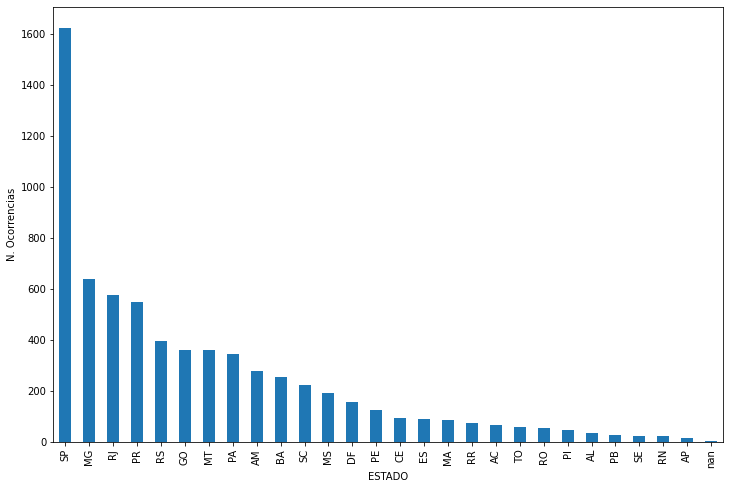

In [ ]:
# plotagem .plot. tipo de plotagem (tem barra(bar), pizza (pie), linhas(line))
df.groupby(['uf'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='ESTADO',ylabel='N. Ocorrencias')

<AxesSubplot:ylabel='Casos de Saída de Pista'>

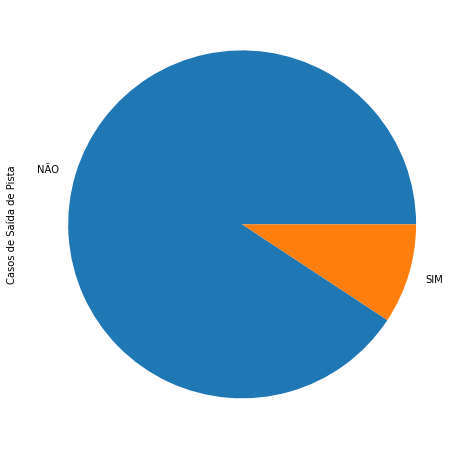

In [ ]:
df.groupby('saida_pista',dropna=False).size().sort_values(ascending=False).plot.pie(figsize=(12,8),ylabel='Casos de Saída de Pista')

#### Análises por tipo de acidente

In [48]:
df.groupby(['classificacao']).size().sort_values(ascending=False)

classificacao
INCIDENTE          3795
ACIDENTE           2090
INCIDENTE GRAVE     884
dtype: int64

<AxesSubplot:xlabel='classificacao'>

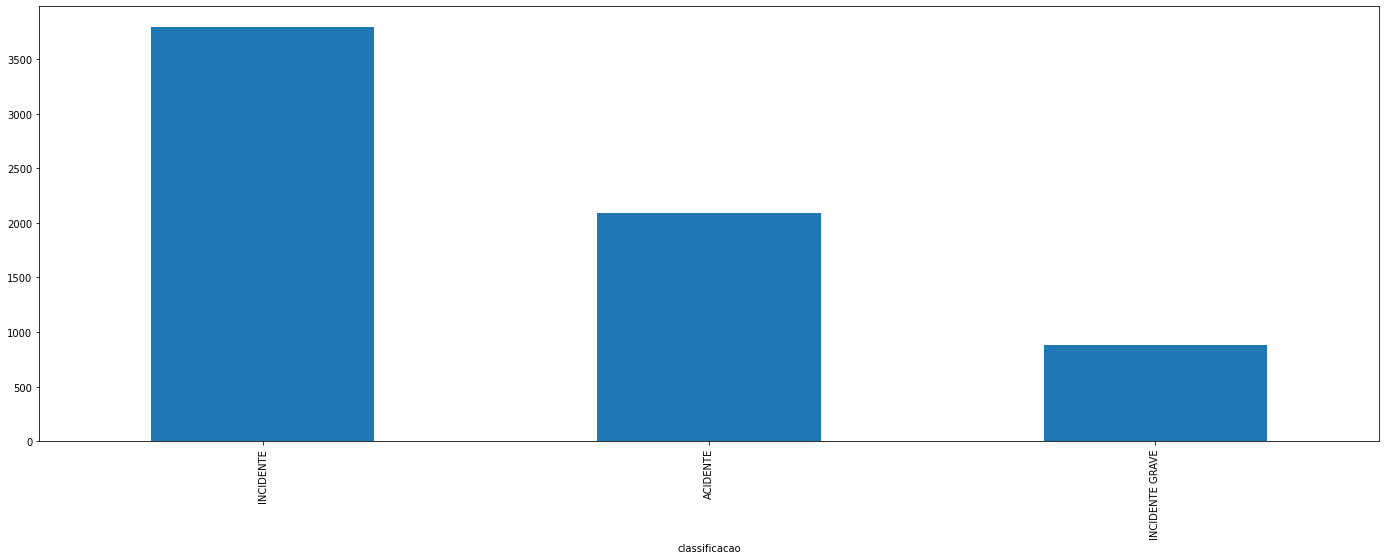

In [50]:
df.groupby(['classificacao']).size().sort_values(ascending=False).plot.bar(figsize=(24,8))

<AxesSubplot:ylabel='None'>

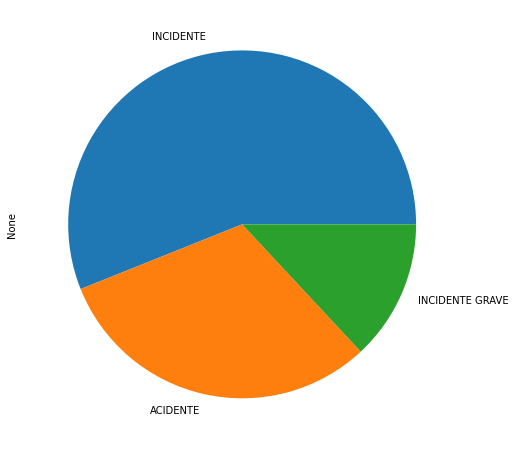

In [51]:
df.groupby(['classificacao']).size().sort_values(ascending=False).plot.pie(figsize=(24,8))

#### Análise de quantidade de acidentes por UF

In [52]:
df.groupby(['uf'],dropna=False).size().sort_values(ascending=False)

uf
SP     1625
MG      638
RJ      578
PR      548
RS      395
GO      359
MT      359
PA      344
AM      279
BA      253
SC      223
MS      191
DF      156
PE      126
CE       95
ES       91
MA       86
RR       73
AC       66
TO       60
RO       54
PI       45
AL       34
PB       28
SE       22
RN       22
AP       15
NaN       4
dtype: int64

<AxesSubplot:xlabel='ESTADO', ylabel='N. Ocorrencias'>

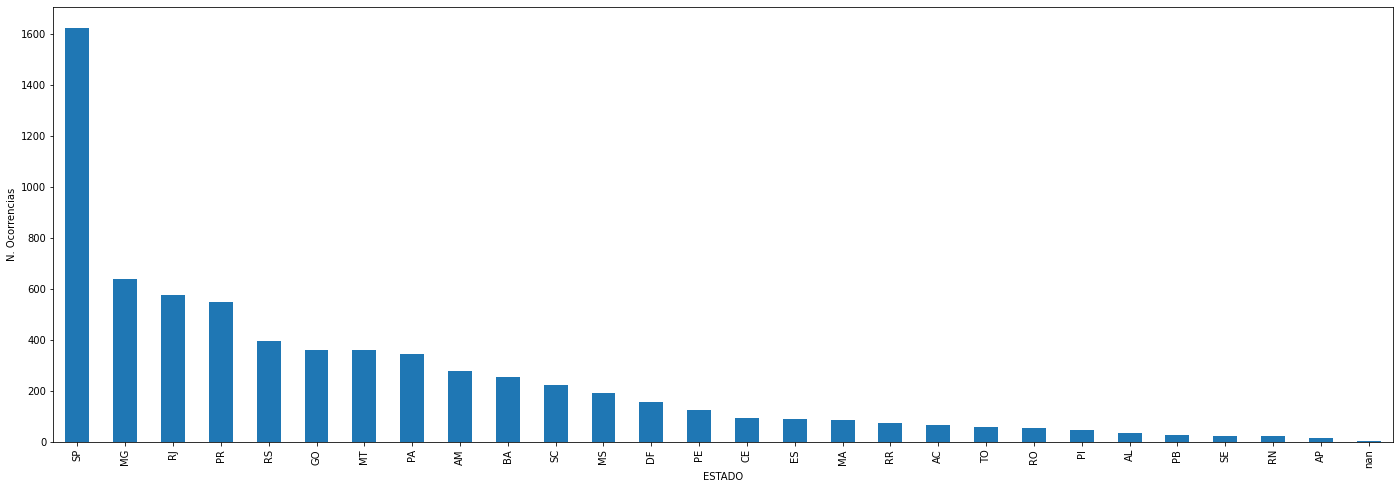

In [54]:
df.groupby(['uf'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(24,8),xlabel='ESTADO',ylabel='N. Ocorrencias')

##### Dividindo a análise de quantidade de acidentes por regiões

In [114]:
df_regioes = df.copy()
df_regioes.loc[df_regioes['uf'] == 'SP', 'regiao'] = 'SUDESTE'
df_regioes.loc[df_regioes['uf'] == 'MG', 'regiao'] = 'SUDESTE'
df_regioes.loc[df_regioes['uf'] == 'RJ', 'regiao'] = 'SUDESTE'
df_regioes.loc[df_regioes['uf'] == 'PR', 'regiao'] = 'SUL'
df_regioes.loc[df_regioes['uf'] == 'RS', 'regiao'] = 'SUL'
df_regioes.loc[df_regioes['uf'] == 'GO', 'regiao'] = 'CENTRO-OESTE'
df_regioes.loc[df_regioes['uf'] == 'MT', 'regiao'] = 'CENTRO-OESTE'
df_regioes.loc[df_regioes['uf'] == 'PA', 'regiao'] = 'NORTE'
df_regioes.loc[df_regioes['uf'] == 'AM', 'regiao'] = 'NORTE'
df_regioes.loc[df_regioes['uf'] == 'BA', 'regiao'] = 'NORDESTE'
df_regioes.loc[df_regioes['uf'] == 'SC', 'regiao'] = 'SUL'
df_regioes.loc[df_regioes['uf'] == 'MS', 'regiao'] = 'CENTRO-OESTE'
df_regioes.loc[df_regioes['uf'] == 'DF', 'regiao'] = 'CENTRO-OESTE'
df_regioes.loc[df_regioes['uf'] == 'PE', 'regiao'] = 'NORDESTE'
df_regioes.loc[df_regioes['uf'] == 'CE', 'regiao'] = 'NORDESTE'
df_regioes.loc[df_regioes['uf'] == 'ES', 'regiao'] = 'SUDESTE'
df_regioes.loc[df_regioes['uf'] == 'MA', 'regiao'] = 'NORDESTE'
df_regioes.loc[df_regioes['uf'] == 'RR', 'regiao'] = 'NORTE'
df_regioes.loc[df_regioes['uf'] == 'AC', 'regiao'] = 'NORTE'
df_regioes.loc[df_regioes['uf'] == 'TO', 'regiao'] = 'NORTE'
df_regioes.loc[df_regioes['uf'] == 'RO', 'regiao'] = 'NORTE'
df_regioes.loc[df_regioes['uf'] == 'PI', 'regiao'] = 'NORDESTE'
df_regioes.loc[df_regioes['uf'] == 'AL', 'regiao'] = 'NORDESTE'
df_regioes.loc[df_regioes['uf'] == 'PB', 'regiao'] = 'NORDESTE'
df_regioes.loc[df_regioes['uf'] == 'SE', 'regiao'] = 'NORDESTE'
df_regioes.loc[df_regioes['uf'] == 'RN', 'regiao'] = 'NORDESTE'
df_regioes.loc[df_regioes['uf'] == 'AP', 'regiao'] = 'NORTE'
df_regioes.loc[df_regioes['uf'].isnull(), 'regiao'] = "NaN"

In [115]:
df_regioes.replace(["NaN"],np.NaN,inplace=True)

In [116]:
df_regioes.groupby(['regiao'],dropna=False).size().sort_values(ascending=False)

regiao
SUDESTE         2932
SUL             1166
CENTRO-OESTE    1065
NORTE            891
NORDESTE         711
NaN                4
dtype: int64

<AxesSubplot:xlabel='regiao'>

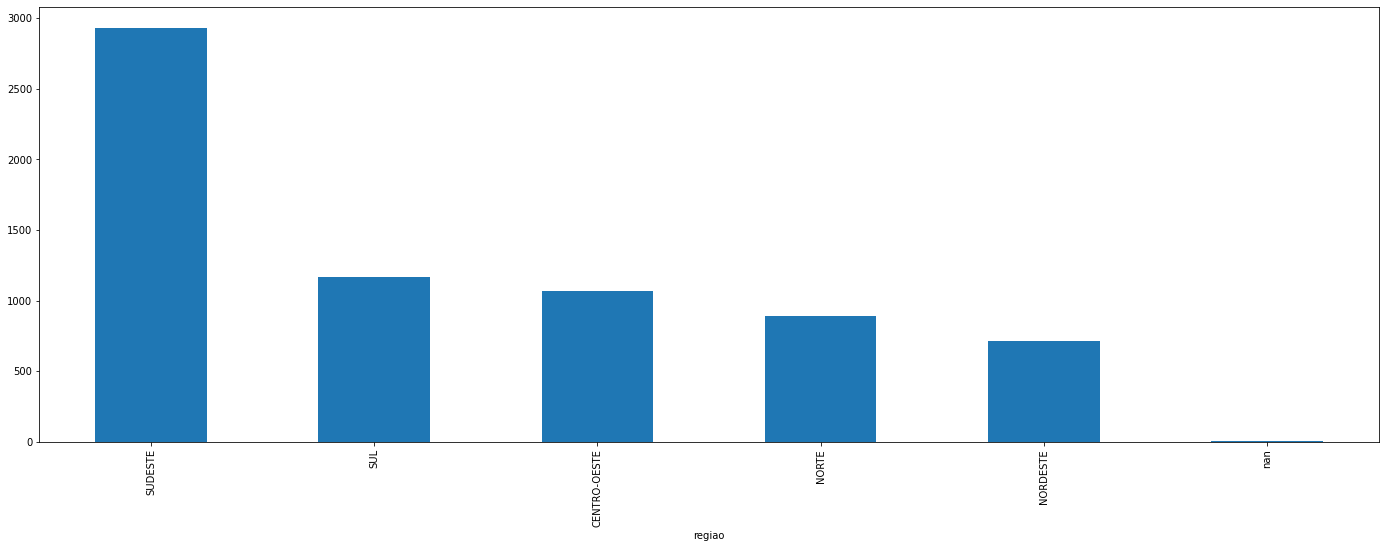

In [117]:
df_regioes.groupby(['regiao'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(24,8))

Fica claro que a região sudente concentra o maior número de ocorridos.

#### Análise de número de aeronaves envolvidas nos acidentes

In [59]:
df['n_aeronaves'].value_counts()

1    6682
2      84
3       3
Name: n_aeronaves, dtype: int64

<AxesSubplot:xlabel='n_aeronaves'>

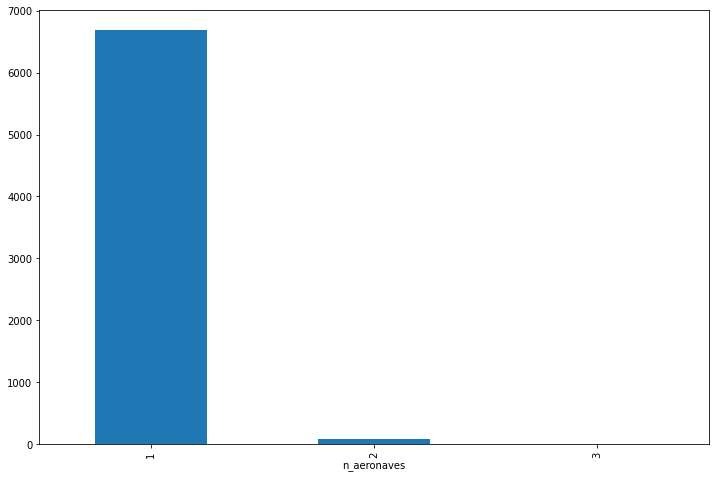

In [62]:
df.groupby(['n_aeronaves']).size().sort_values(ascending=False).plot.bar(figsize=(12,8))

É perceptível que a maioria esmagadora das ocorrências se dá com uma única aeronave, será que os ocorridos com mais de uma revela algum padrão? ocorre em um mesmo estado? em um mesmo periodo do ano? ou em um mesmo aerodromo?

In [63]:
df_mais1_aeronave = df.loc[df['n_aeronaves'] >= 2]

In [64]:
df_mais1_aeronave

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
29,81004,INCIDENTE GRAVE,TERESINA,PI,BRASIL,SBTE,2022-09-15,12:50:00,0,2,NÃO
103,80911,INCIDENTE,CHAPECÓ,SC,BRASIL,SBCH,2022-08-05,17:22:00,0,2,NÃO
106,80959,INCIDENTE GRAVE,GOIÂNIA,GO,BRASIL,SBGO,2022-08-03,20:50:00,0,2,NÃO
114,80882,INCIDENTE,BAURU,SP,BRASIL,SBBU,2022-07-27,17:30:00,0,2,NÃO
130,80870,INCIDENTE,CAMPO GRANDE,MS,BRASIL,SSKG,2022-07-19,18:38:00,0,2,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
5805,51807,INCIDENTE,SOROCABA,SP,BRASIL,SDCO,2011-09-04,13:38:00,0,2,NÃO
5824,45222,INCIDENTE GRAVE,CARUARU,PE,BRASIL,NaN,2011-08-21,11:46:00,0,2,NÃO
5941,44944,ACIDENTE,CORUMBÁ,MS,BRASIL,NaN,2011-06-10,20:30:00,4,2,NÃO
6149,43869,ACIDENTE,RIO DE JANEIRO,RJ,BRASIL,NaN,2011-02-05,17:15:00,0,2,NÃO


Agora verifico novamente o número de acidentes por Uf para comparar com a análise anterior

In [65]:
df_mais1_aeronave.groupby(['uf'],dropna=False).size().sort_values(ascending=False)

uf
SP    27
GO     9
RJ     9
PR     7
SC     5
RS     5
BA     5
PE     4
MS     3
DF     3
MG     2
MT     1
PA     1
CE     1
PI     1
RO     1
RR     1
ES     1
SE     1
dtype: int64

<AxesSubplot:xlabel='ESTADO', ylabel='N. Ocorrencias'>

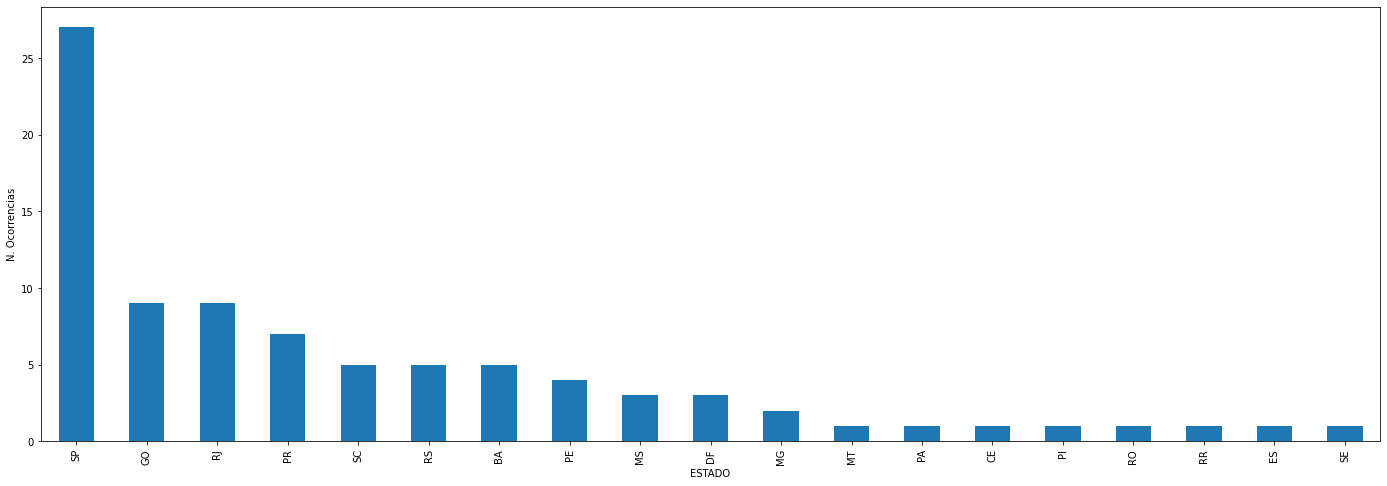

In [66]:
df_mais1_aeronave.groupby(['uf'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(24,8),xlabel='ESTADO',ylabel='N. Ocorrencias')

Conclusões:

In [67]:
df.groupby(['uf'],dropna=False).size().sort_values(ascending=False)

uf
SP     1625
MG      638
RJ      578
PR      548
RS      395
GO      359
MT      359
PA      344
AM      279
BA      253
SC      223
MS      191
DF      156
PE      126
CE       95
ES       91
MA       86
RR       73
AC       66
TO       60
RO       54
PI       45
AL       34
PB       28
SE       22
RN       22
AP       15
NaN       4
dtype: int64

#### Análise por saída de pista

In [68]:
df.groupby(['saida_pista']).size().sort_values(ascending=False)

saida_pista
NÃO    6141
SIM     628
dtype: int64

<AxesSubplot:ylabel='None'>

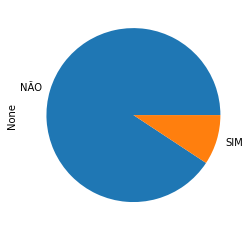

In [69]:
df.groupby(['saida_pista']).size().sort_values(ascending=False).plot.pie()

Percebe-se que menos de 10% incorre em saída de pista, então vale analisar em detalhes apenas os que isso ocorreu em vez de analisar todos.

##### Análise apenas dos acidentes que saíram da pista

In [72]:
df_saida_pista = df.loc[df['saida_pista'] == "SIM"]

Em quais estados ocorreram essa saída de pista?

In [76]:
df_saida_pista.groupby(['uf'],dropna=False).size().sort_values(ascending=False)

uf
SP    143
MT     57
PR     56
RS     51
GO     50
MG     48
PA     43
AM     30
BA     28
SC     20
MS     18
RJ     16
RR     12
TO      8
MA      8
AC      7
CE      6
PE      5
RO      5
ES      5
PI      4
DF      4
PB      2
AL      1
RN      1
dtype: int64

<AxesSubplot:xlabel='uf'>

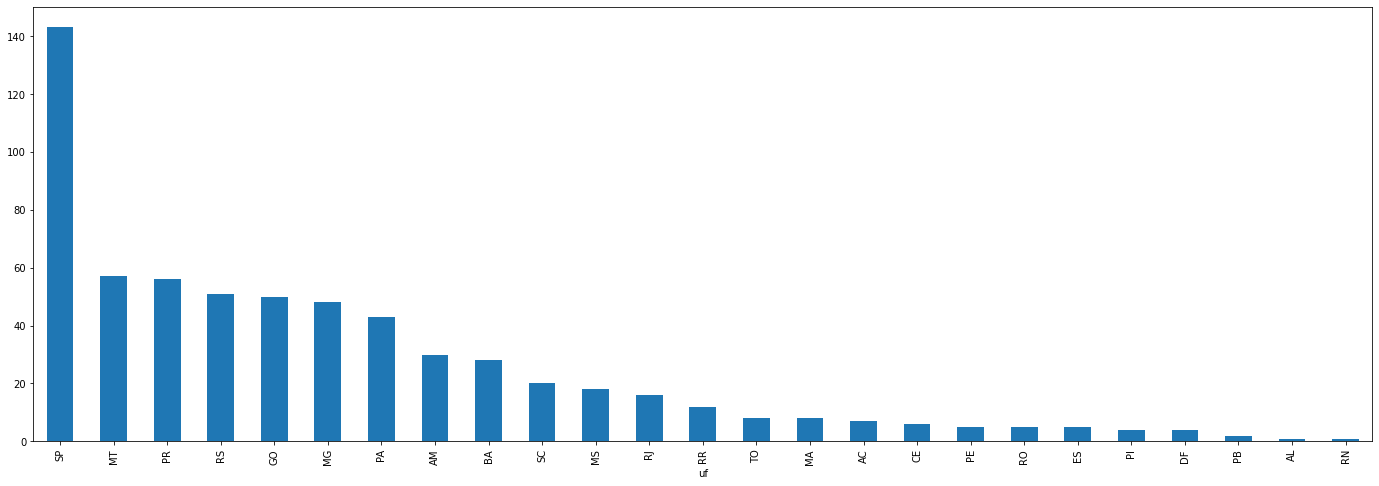

In [78]:
df_saida_pista.groupby(['uf'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(24,8))

Parece seguir o padrão de acidentes por estado

Os acidentes que incorrem saida de pista costumam envolver mais de uma aeronave?

In [79]:
df_saida_pista['n_aeronaves'].value_counts()

1    628
Name: n_aeronaves, dtype: int64

Aqui percebo que todos envolvem apenas 1 aeronave

Qual a classificação desses acidentes que saem da pista?

In [80]:
df_saida_pista.groupby(['classificacao']).size().sort_values(ascending=False)

classificacao
ACIDENTE           317
INCIDENTE GRAVE    245
INCIDENTE           66
dtype: int64

<AxesSubplot:xlabel='classificacao'>

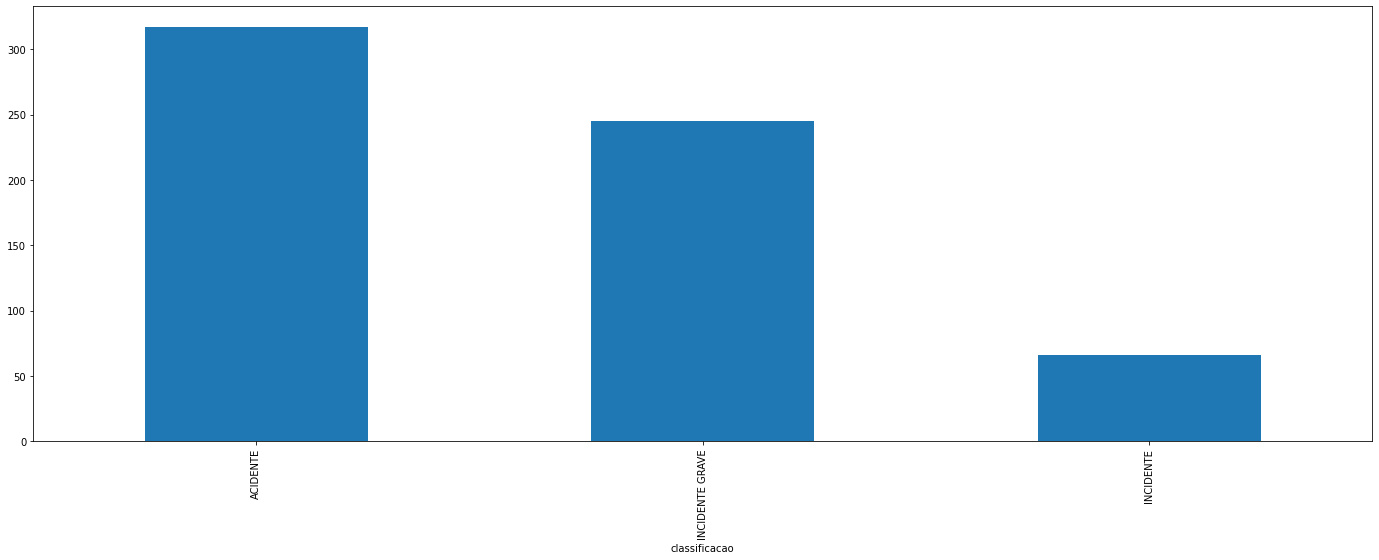

In [81]:
df_saida_pista.groupby(['classificacao']).size().sort_values(ascending=False).plot.bar(figsize=(24,8))

Comparação com a classificação de acidentes total

In [82]:
df.groupby(['classificacao']).size().sort_values(ascending=False)

classificacao
INCIDENTE          3795
ACIDENTE           2090
INCIDENTE GRAVE     884
dtype: int64

Percebe-se que no total de acidente a maior quantidade se dá aos incidentes, em segundo lugar aos acidentes e em terceiro os incidentes graves, mas no que tange os que envolve aeronaves que sairam da pista o maior número é de acidentes, em segundo lugar de incidentes graves e em terceiro incidentes

#### Análisando os dados que constam sem aerodromo
Será que os problemas vieram de uma mesma cidade? mesmo estado? mesma período do ano?

In [89]:
df

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,BRASIL,SBSP,2022-10-09,16:30:00,0,1,SIM
1,81030,INCIDENTE,VITÓRIA,ES,BRASIL,SBVT,2022-10-09,16:20:00,0,1,NÃO
2,81023,INCIDENTE GRAVE,AMERICANA,SP,BRASIL,SDAI,2022-10-06,15:30:00,0,1,SIM
3,81029,INCIDENTE,BELO HORIZONTE,MG,BRASIL,SBBH,2022-10-06,00:44:00,0,1,NÃO
4,81025,INCIDENTE,MANAUS,AM,BRASIL,SBEG,2022-10-05,20:56:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,BRASIL,SBPK,2010-01-05,19:25:00,0,1,NÃO
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,NaN,2010-01-04,17:30:00,0,1,NÃO
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,NaN,2010-01-03,12:00:00,0,1,NÃO
6767,40349,INCIDENTE,BELÉM,PA,BRASIL,SBBE,2010-01-03,11:05:00,0,1,NÃO


In [119]:
df_aerodromo_inconsistente = df.loc[df['aerodromo'].isnull()]

In [94]:
df_aerodromo_inconsistente

,codigo_ocorrencia,classificacao,cidade,uf,pais,aerodromo,data,horario,total_recomendacoes,n_aeronaves,saida_pista
5,81019,ACIDENTE,PORTO ALEGRE,RS,BRASIL,NaN,2022-10-03,20:50:00,0,1,NÃO
6,81022,INCIDENTE,LOBATO,PR,BRASIL,NaN,2022-10-03,15:38:00,0,1,NÃO
7,81021,ACIDENTE,NOVA BANDEIRANTES,MT,BRASIL,NaN,2022-10-02,19:00:00,0,1,SIM
8,81009,INCIDENTE GRAVE,NAVIRAÍ,MS,BRASIL,NaN,2022-10-01,10:10:00,0,1,SIM
9,81012,INCIDENTE,LINHARES,ES,BRASIL,NaN,2022-09-30,12:20:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...
6758,39789,INCIDENTE,SÃO PEDRO DO SUL,RS,BRASIL,NaN,2010-01-10,21:30:00,0,1,NÃO
6761,39707,INCIDENTE GRAVE,CANUTAMA,AM,BRASIL,NaN,2010-01-09,12:30:00,3,1,NÃO
6763,39807,INCIDENTE,SALVADOR,BA,BRASIL,NaN,2010-01-06,17:53:00,0,1,NÃO
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,NaN,2010-01-04,17:30:00,0,1,NÃO


In [95]:
df_aerodromo_inconsistente.groupby(['uf'],dropna=False).size().sort_values(ascending=False)

uf
SP     504
RJ     225
MG     223
MT     213
PR     193
RS     173
GO     172
PA     161
AM     106
MS     100
BA      95
SC      81
MA      45
DF      45
RR      40
PE      35
ES      34
CE      34
TO      30
AC      23
PI      20
RO      19
SE       9
PB       9
AL       9
RN       8
AP       8
NaN      4
dtype: int64

<AxesSubplot:xlabel='uf'>

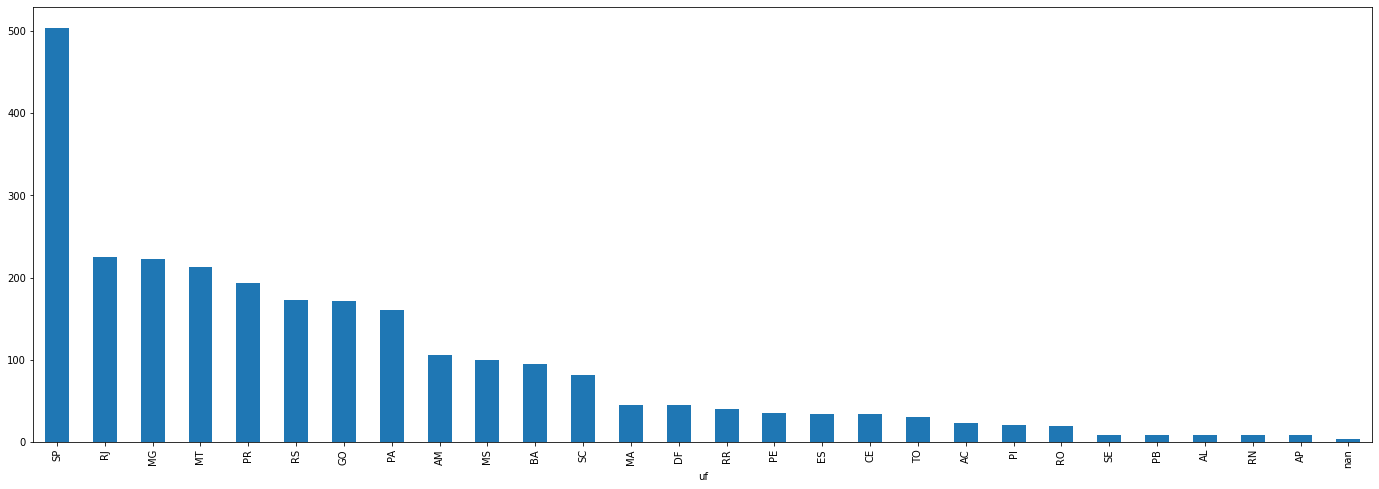

In [97]:
df_aerodromo_inconsistente.groupby(['uf'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(24,8))

não parece haver um padrão de Uf para os dados inconsistêntes no aerodromo

In [108]:
df_aerodromo_inconsistente.groupby(['data'],dropna=False).size()

data
2010-01-03    1
2010-01-04    1
2010-01-06    1
2010-01-09    1
2010-01-10    2
             ..
2022-09-27    1
2022-09-30    1
2022-10-01    1
2022-10-02    1
2022-10-03    2
Length: 1913, dtype: int64

<AxesSubplot:xlabel='data'>

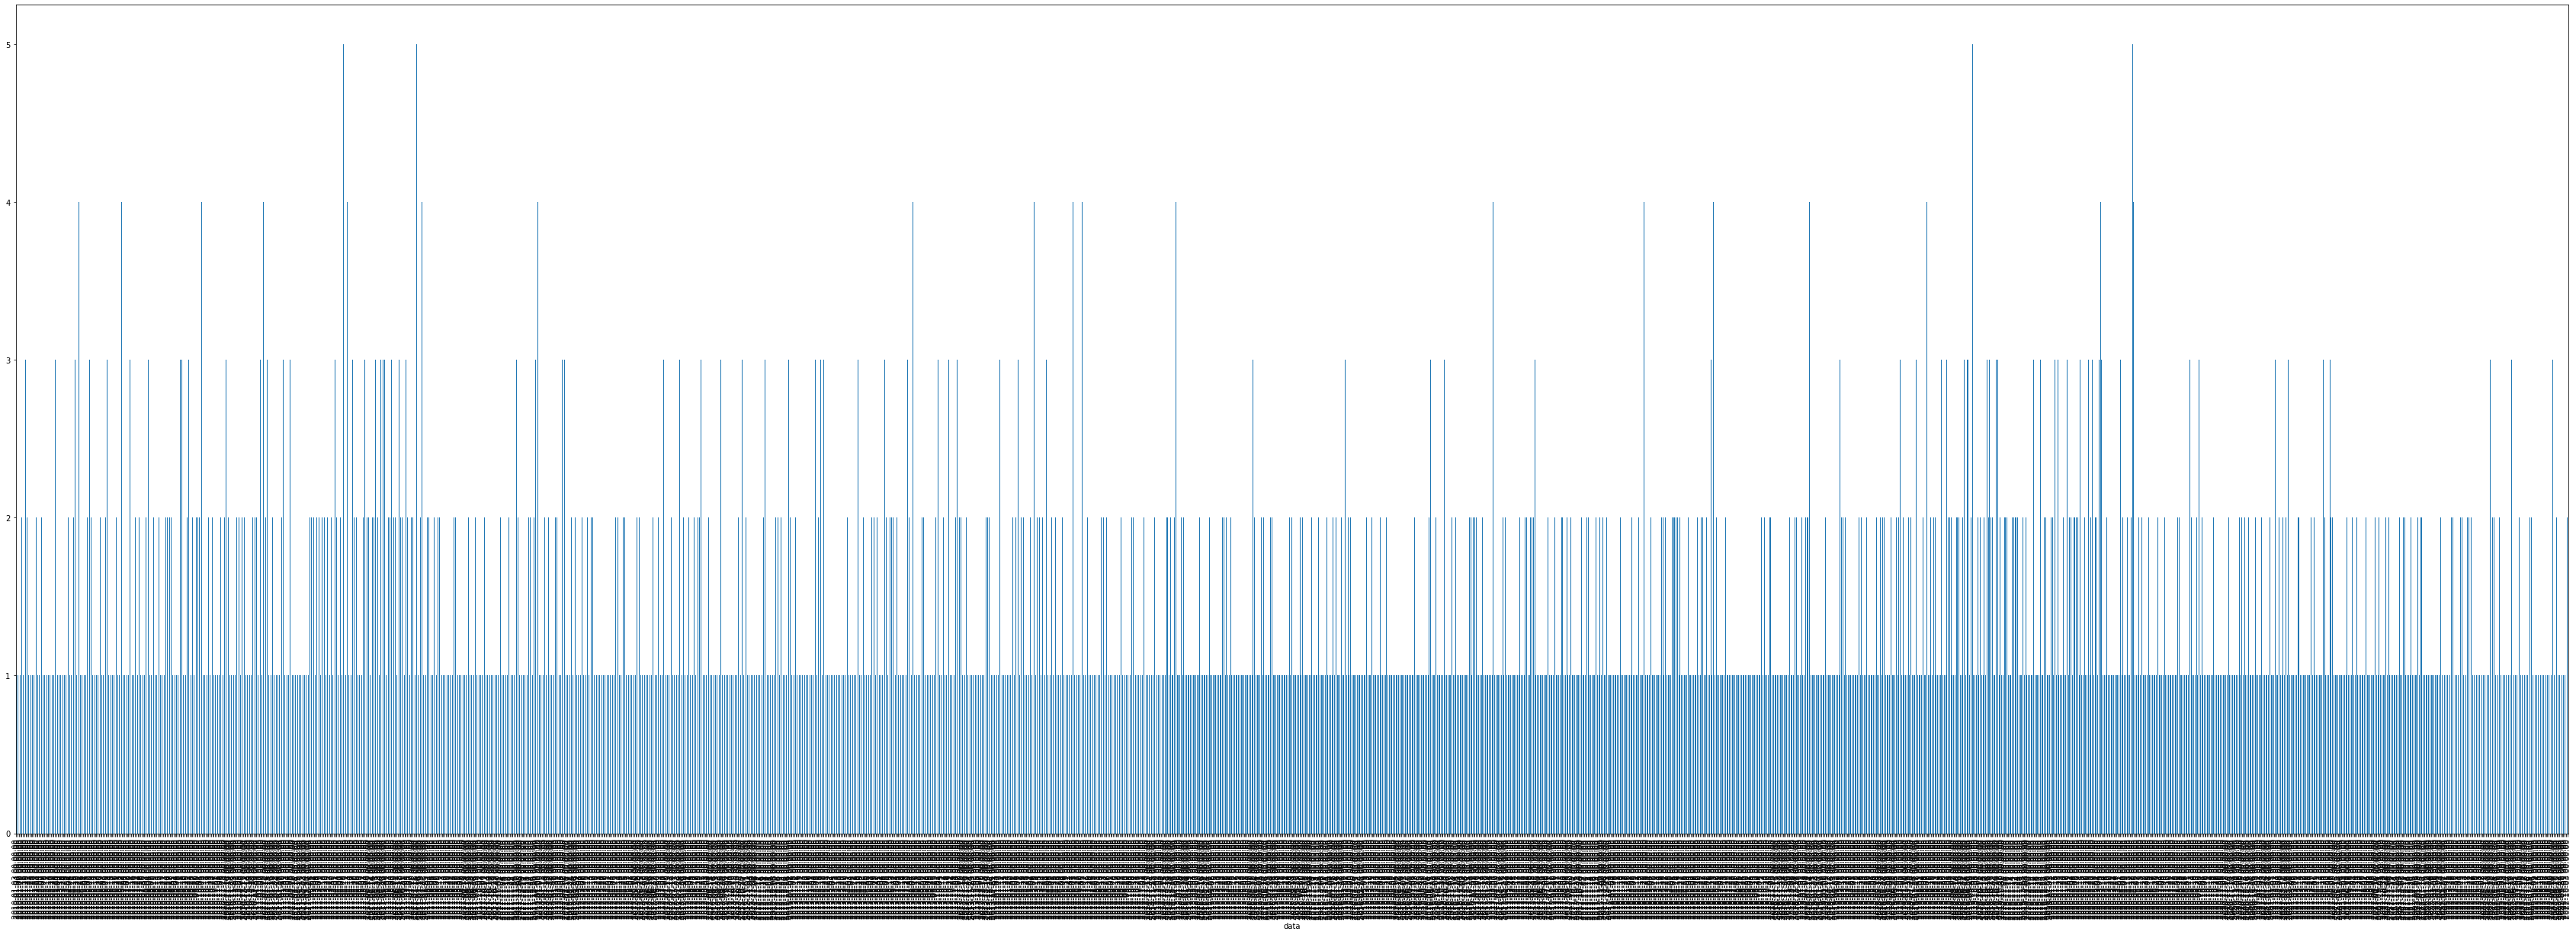

In [105]:
df_aerodromo_inconsistente.groupby(['data'],dropna=False).size().plot.bar(figsize=(60,20))

aparentemente não há um padrão temporal para o registro de aerodromo inconsistentes

Será que categorizando as inconcistências por região algum padrão surge?

In [120]:
df_aerodromo_inconsistente = df_regioes.loc[df['aerodromo'].isnull()]

In [121]:
df_aerodromo_inconsistente.groupby(['regiao'],dropna=False).size().sort_values(ascending=False)

regiao
SUDESTE         986
CENTRO-OESTE    530
SUL             447
NORTE           387
NORDESTE        264
NaN               4
dtype: int64

<AxesSubplot:xlabel='regiao'>

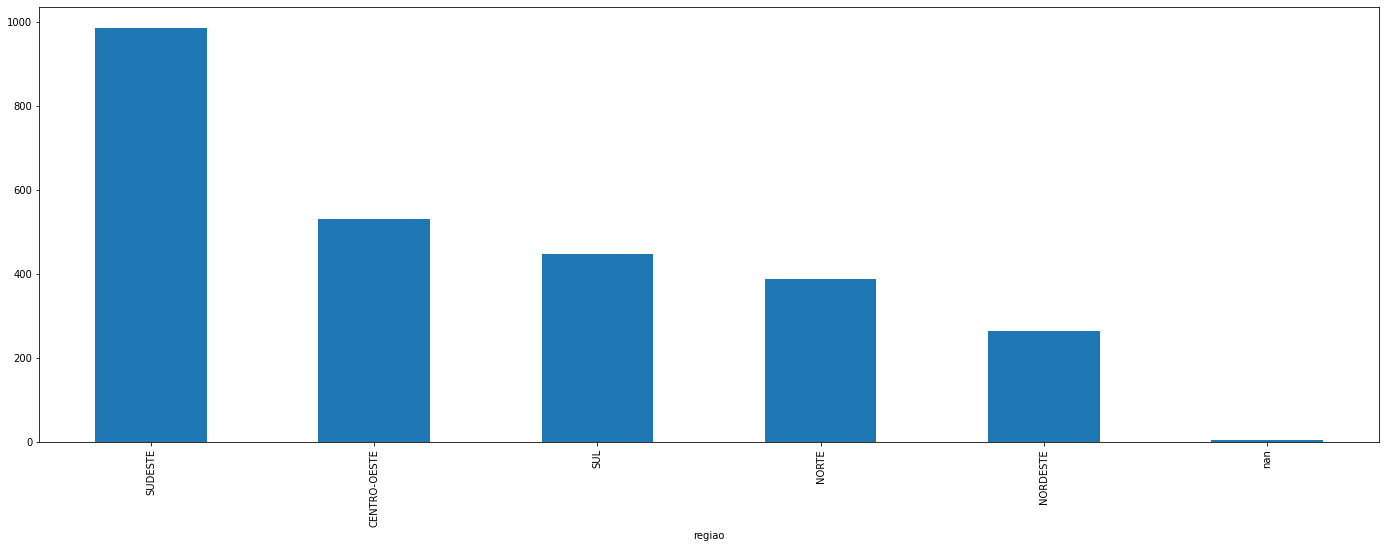

In [122]:
df_aerodromo_inconsistente.groupby(['regiao'],dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(24,8))

Aparentemente não, segue o mesmo padrão de número de acidentes, o que me leve a acreditar que quanto maior o número de registros de ocorrências cresce também o número de inconssistências nos registros

# Conclusões das Análises

Classificação de Ocorrência:    
    *   De maneira geral a maior parte se dá por incidentes, a segunda maior por acidentes e a menor parte por incidentes graves.    
        
Local da Ocorrência:    
    *   O maior número de ocorridos se dá na região sudeste, principalmente no estado de São Paulo    
    *   O menor número de ocorrências ocorre na região nordeste.    
    
Quantidade de Aeronaves:     
    *   A maior parte dos ocorridos envolvem apenas uma aeronave    
    *   Quando consideramos apenas os ocorridos que envolvem apenas mais de uma aeronave alguns estados que eram campeões de ocorrências descem bastantes posições, como é o caso do Mato Grosso.        

Saída de Pista:    
    *   Mais de 90% dos ocorridos não envolvem saída de pista    
    *   Os ocorridos que envolvem saída de pista(menos de 10% do total) seguem o mesmo padrão de quantidade de acidente pro Uf do total de ocorridos.    
    *   Das ocorrências qe houveram saída de pista(menos de 10% do total) mudam o padrão de classificação de tipo de ocorrência, passando a ser a maior parte de acidentes, a segunda maior incidentes graves e a menor de incidentes   
     
Inconsistências da Coluna Aerodromo:    
    *   Não foi visualizado nenhum padrão regional ou temporal qual ao registro inconsistente dos dados de aerodromo, porém for percebido que ele cresce proporcionalmente ao número de ocorrências, logo deve haver uma ligação diretamente proporcional entre o número de registros a serem feitos e o números de erros de nos resgistros.















